# Dashboard Application with Plotly Dash 

In [2]:
# Libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import dash
from dash import html #import dash_html_components as html
from dash import dcc  #import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px
import wget

In [3]:
# Getting Data
#dataset=wget.download("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv")
spacex_df=pd.read_csv('spacex_launch_dash.csv')
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

In [5]:
# Getting Skeleton
#skeleton=wget.download("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/spacex_dash_app.py")

# APPLICATION

In [ ]:
app = dash.Dash(__name__)
# app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                # dcc.Dropdown(id='site-dropdown',...)
                                dcc.Dropdown(id='site-dropdown',
                                                     options=[{'label': 'All Sites', 'value': 'ALL'},
                                                              {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                                                              {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
                                                              {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                                                              {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}],
                                                     placeholder='Select a Launch Site Here',
                                                     value='ALL',
                                                     searchable=True, 
                                                     style={'width':'80%', 
                                                            'padding':'3px',
                                                            'font-size':'20px',
                                                            'text-align-last':'center'}), # Dropdown 'site-dropdown'    
                                
                                html.Br(),# html.br Dropdown 
                               
                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                #dcc.RangeSlider(id='payload-slider',...)
                                       html.Div(dcc.RangeSlider(id='payload-slider',
                                                                min=0, 
                                                                max=16000, 
                                                                step=1000,
                                                                marks={0: '0', 1000: '1000',2000: '2000',3000: '3000',4000: '4000',
                                                                      5000: '5000',6000: '6000',7000: '7000',8000: '8000',9000: '9000',
                                                                      10000: '10000',11000: '11000',12000: '12000',13000: '13000',14000: '14000',
                                                                      15000: '15000',16000: '16000'},
                                                                value=[min_payload, min_payload]        
                                                                ) # RangeSlider  payload-slider
                                               
                                               ),# html.Div RangeSlider
                               
                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# Callback 1
# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'))   
             
# Decorator 1
def get_pie_chart(entered_site):
    
    if entered_site == 'ALL':
        fig = px.pie(spacex_df,
                     values='class', 
                     names='Launch Site', 
                     title='Launch Success')
        return fig
    else:
        
        Site=spacex_df.loc[spacex_df['Launch Site']==entered_site]
        Outcome=Site.groupby('Launch Site')['class'].value_counts()
        fig = px.pie(values=[Outcome[0],Outcome[1]], 
                     names=['unsuccessful','successful'], 
                     title=f'Launch Outcome site: {entered_site}')
        return fig

# Callback 2   
# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output

@app.callback(Output(component_id='success-payload-scatter-chart',component_property='figure'),
                [Input(component_id='site-dropdown',component_property='value'),
                Input(component_id='payload-slider',component_property='value')])
               #[State("success-payload-scatter-chart", 'children')
         
# Decorator 2

def scatter(entered_site,payload):
    filtered_df = spacex_df[spacex_df['Payload Mass (kg)'].between(payload[0],payload[1])]
    # thought reusing filtered_df may cause issues, but tried it out of curiosity and it seems to be working fine
    
    if entered_site=='ALL':
        fig=px.scatter(filtered_df,x='Payload Mass (kg)',y='class',color='Booster Version Category',title='Success count on Payload mass for all sites')
        return fig
    else:
        fig=px.scatter(filtered_df[filtered_df['Launch Site']==entered_site],x='Payload Mass (kg)',y='class',color='Booster Version Category',title=f"Success count on Payload mass for site {entered_site}")
        return fig

# Run the app
if __name__ == '__main__':
    app.run_server()   
        
app.run_server(mode='inline', host='localhost')

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [14/Aug/2022 13:21:21] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Aug/2022 13:21:21] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_4_1m1652986786.12.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Aug/2022 13:21:21] "GET /_dash-component-suites/dash/deps/react@16.v2_4_1m1652986786.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Aug/2022 13:21:21] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_4_1m1652986786.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Aug/2022 13:21:21] "GET /_dash-component-suites/dash/dash-renderer/build/dash_renderer.v2_4_1m1652986786.min.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Aug/2022 13:21:21] "GET /_dash-component-suites/dash/dcc/dash_core_components.v2_4_0m1652986786.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Aug/2022 13:21:21] "GET /_dash-component-suites/dash/dcc/dash_core_components-shared.v2_4_0m1652986786.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Aug/2022 13:21:21] "GET /_dash-component-sui

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/home/bmb/.local/lib/python3.8/site-packages/flask/app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/bmb/.local/lib/python3.8/site-packages/flask/app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/bmb/.local/lib/python3.8/site-packages/flask/app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/bmb/.local/lib/python3.8/site-packages/flask/app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "/home/bmb/.local/lib/python3.8/site-packages/dash/dash.py", line 1372, in dispatch
    response.set_data(func(*args, outputs_list=outputs_list))
  File "/home/bmb/.local/lib/python3.8/site-packages/dash/_callback.py", line 191, in add_context
    jsonResponse = to_json(response)
  File "/home/bmb/.local/lib/python3.8

127.0.0.1 - - [14/Aug/2022 13:21:23] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [14/Aug/2022 13:21:29] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [14/Aug/2022 13:21:29] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [14/Aug/2022 13:21:33] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [14/Aug/2022 13:21:42] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [14/Aug/2022 13:22:12] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [14/Aug/2022 13:22:12] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [14/Aug/2022 13:22:22] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [14/Aug/2022 13:22:22] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [14/Aug/2022 13:22:25] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [14/Aug/2022 13:22:25] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [14/Aug/2022 13:22:49] "POST /_dash-update-component HTTP/1.1" 200 -
127.

In [ ]:
def get_scatter_plot(entered_site, slider_range):

    if entered_site=='ALL':
        
        df = spacex_df[(spacex_df['Payload Mass (kg)'] > slider_range[0]) & (spacex_df['Payload Mass (kg)'] < slider_range[1])]
        fig = px.scatter(df, 
                         x="Payload Mass (kg)", 
                         y="class", 
                         color="Booster Version Category",
                         title='Success count on Payload mass for all sites')
        return fig
    else:
        Site=spacex_df.loc[spacex_df['Launch Site']==entered_site]
        
        Range_payload=[(Site['Payload Mass (kg)'] > slider_range[0]) & (Site['Payload Mass (kg)'] < slider_range[1])]
        fig = px.scatter(Range_payload, 
                         x="Payload Mass (kg)", 
                         y="class", 
                         color="Booster Version Category",
                         title=f"Success count on Payload mass for site {entered_site}")
        return fig

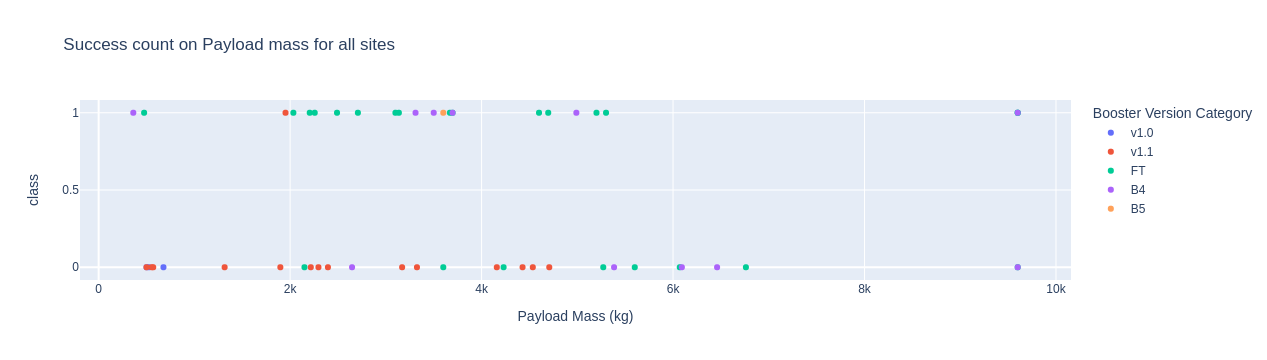

In [18]:
A=get_scatter_plot(entered_site='ALL',slider_range=[0,10000],spacex_df=spacex_df)
A